# Imports

In [ ]:
from urllib.request import urlopen as uReq 
import csv 
import pandas as pd 

In [ ]:
import csv
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load Data

In [ ]:
url1 = ""
file_id = url1.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.head(5)

,the_review
0,I actually had a riot and enjoyed it.
1,Where Ruben Fleischer's first film was bloated...
2,"Where the first Venom was toxically dull, Veno..."
3,It makes no bones about being anything other t...
4,Too much carnage and not enough plot and chara...


# Stop Words

In [ ]:
stop_words = set(stopwords.words('english')) 
word_tokens=[]
for review in df['the_review']:   
    word_tokens = word_tokens + word_tokenize(review) 
  
filtered_word_reviews = [w for w in word_tokens if not w in stop_words]

In [ ]:
print(word_tokens[:10]) 
print(filtered_word_reviews[:10])

['I', 'actually', 'had', 'a', 'riot', 'and', 'enjoyed', 'it', '.', 'Where']
['I', 'actually', 'riot', 'enjoyed', '.', 'Where', 'Ruben', 'Fleischer', "'s", 'first']


# Word Cloud

In [ ]:
def drawWordCloud(words, filename):
    text = ''
    for w in words:
        text = text + ' ' + w

    #venom mask 
    mask = np.array(Image.open("/content/classicvenom.jpg"))
    image_colors = ImageColorGenerator(mask)

    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud( background_color="white", max_words=1000, mask=mask).generate(text)
    
    #figure 
    fig, axes = plt.subplots(1,2 , figsize=(16,20))
    axes[0].imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
    axes[1].imshow(wordcloud.recolor(color_func=image_colors,random_state=3),
           interpolation="bilinear")
    for ax in axes:
        ax.set_axis_off()
    plt.savefig(filename+".png", format="png", dpi=200)
    plt.show()

In [ ]:
# select only the adjectives
adjs = [word for (word, pos) in nltk.pos_tag(filtered_word_reviews) if(pos[:2] == 'JJ')]
print(adjs[:15])

['first', 'unwieldy', 'intimate', 'first', 'best', 'comic', 'right', 'much', 'enough', 'dependent', 'grown-ups', 'festival', 'drunken', 'accept', 'whole']


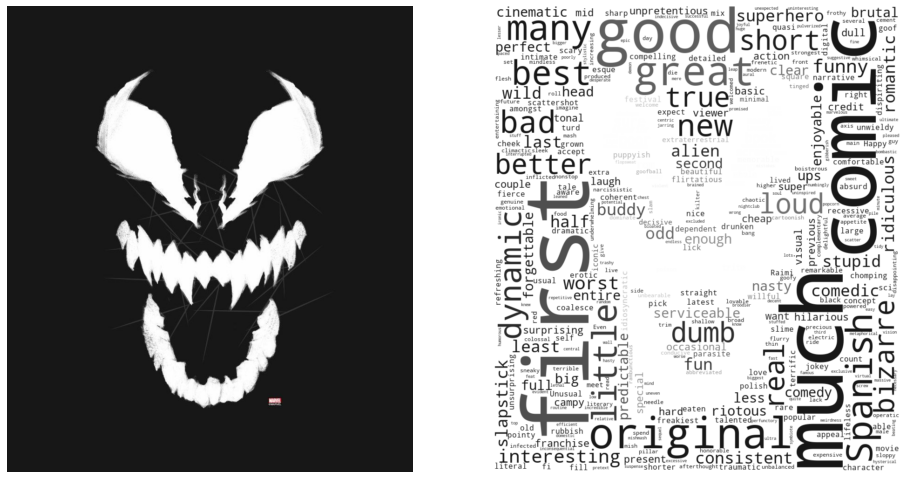

In [ ]:
drawWordCloud(adjs,"venom")